#logistics regression

Diabetes Dataset from sklearn.datasets import load_diabetes

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression #logistics regression
from sklearn.metrics import accuracy_score,confusion_matrix #evaluation for model
from sklearn.datasets import load_diabetes #diabetes dataset

In [3]:
df=load_diabetes()

In [4]:

df.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
diabetes=pd.DataFrame(df.data)

In [10]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
diabetes.columns=df.feature_names

In [12]:
diabetes.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [13]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [14]:
df.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [17]:
dia=pd.read_csv("diabetes.csv")

In [18]:
dia.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

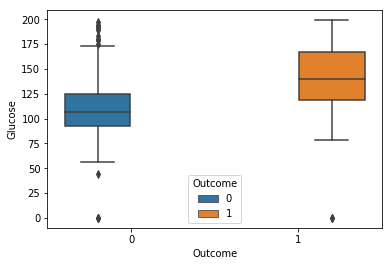

In [21]:
#glucose and outcome,ppl hav high glucose have high diabetes
sns.boxplot(x="Outcome",y="Glucose",data=dia,hue='Outcome')
plt.show()

In [31]:
#avg glucose value of diabetic people

dia.loc[dia["Outcome"]==0,"Glucose"].describe()

count    500.0000
mean     109.9800
std       26.1412
min        0.0000
25%       93.0000
50%      107.0000
75%      125.0000
max      197.0000
Name: Glucose, dtype: float64

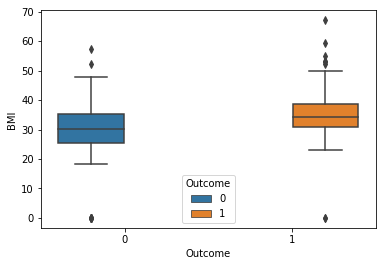

In [32]:
#BMI vs outcome 
sns.boxplot(x='Outcome',y="BMI",data=dia,hue="Outcome")

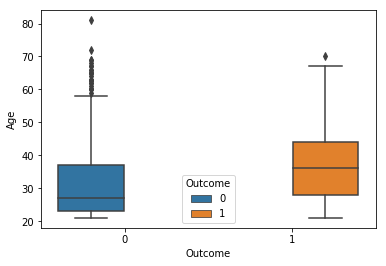

In [33]:
#Age  vs outcome
sns.boxplot(x='Outcome',y="Age",data=dia,hue="Outcome")

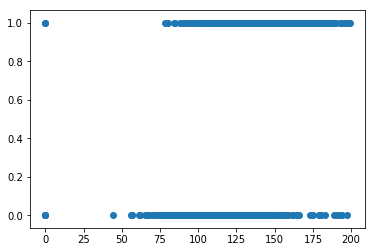

In [36]:
plt.scatter(dia['Glucose'],dia['Outcome'])

In [39]:
#split data in x and y
x=dia.drop("Outcome",axis=1)
y=dia.Outcome

In [40]:
#machine 
lg=LogisticRegression()
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [41]:
#build the model
lg.fit(xtrain,ytrain)

C:\Users\Kalaiyarasi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
pred_dia=lg.predict(xtest)

In [43]:
pred_dia

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
acc=round(accuracy_score(ytest,pred_dia),3)*100

In [48]:
cf=confusion_matrix(ytest,pred_dia) #diagonal are true +ve and true -ve

In [56]:
#visualisation of confusion matrix
ax=sns.heatmap(data=cf,cmap="YlGnBu",annot=True,fmt="g") #fmt is formatting
ax.set(xlabel='Predicted Values',ylabel='Actual Values',title='Confusion Matrix')
plt.tight_layout()

In [ ]:
#evaluate model

In [57]:
from sklearn.metrics import precision_score,recall_score

In [59]:
precision_score(ytest,pred_dia)*100

76.59574468085107

In [61]:
acc

80.7

In [62]:
recall_score(ytest,pred_dia)

0.5806451612903226

In [65]:
#regplot from sns gives sigmoid
#checking the linearity
def sigmoid_plot(x,title):
    sns.regplot(x,y="Outcome",data=dia,logistic=True).set(title=title)

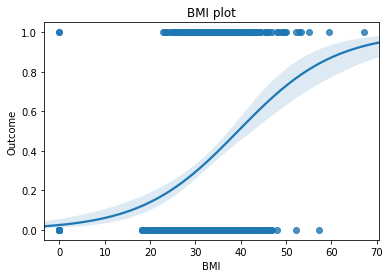

In [66]:
sigmoid_plot("BMI","BMI plot")

In [76]:
probablity=lg.predict_proba(xtest)[::,1]
from sklearn.metrics import roc_curve,roc_auc_score


In [71]:
fpr,tpr,_=roc_curve(ytest,probablity)

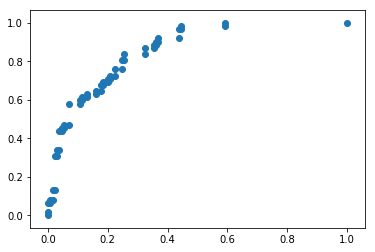

In [72]:
plt.scatter(fpr,tpr)

In [77]:
auc=roc_auc_score(ytest,probablity)

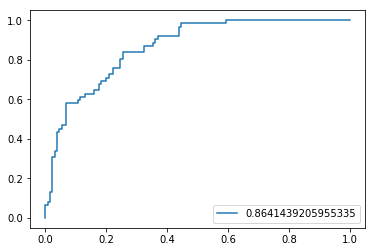

In [79]:
plt.plot(fpr,tpr,label=str(auc))
plt.legend()

In [80]:
auc

0.8641439205955335